<a href="https://colab.research.google.com/github/priyanu17/transfer_learning_for_currency_identification/blob/master/CNN_with_additional_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import os
# os.mkdir('Currency_Images')

In [ ]:
# import zipfile 
# with zipfile.ZipFile("/content/drive/My Drive/150253_347412_bundle_archive.zip", 'r') as zip_ref:
#     zip_ref.extractall("Currency_Images")

In [ ]:
import json

with open('/content/drive/My Drive/cat_to_name.json', 'r') as json_file:
    cat_2_name = json.load(json_file)


In [ ]:
print(cat_2_name['10'])
print(cat_2_name['20'])
print(cat_2_name['30'])
print(cat_2_name['40'])
print(cat_2_name['50'])

5 Centavos,Brazilian Real,brazil
1 Pound,British Pound,united_kingdom
5 Pesos,Chilean Peso,chile
50 Hellers,Czech Koruna,czech_republic
2 Kroner,Danish Krone,denmark


Class Number :  85


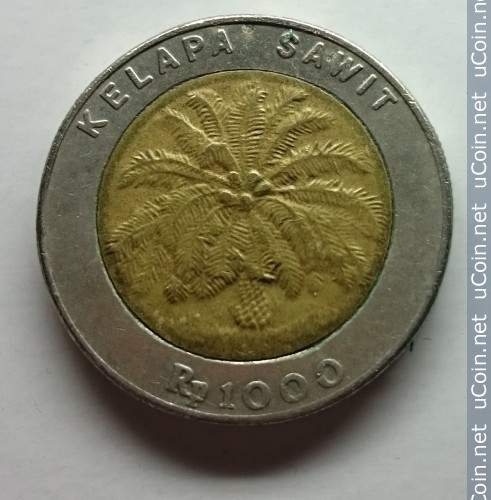

1000 Rupiah,Indonesian Rupiah,indonesia

Class Number :  85


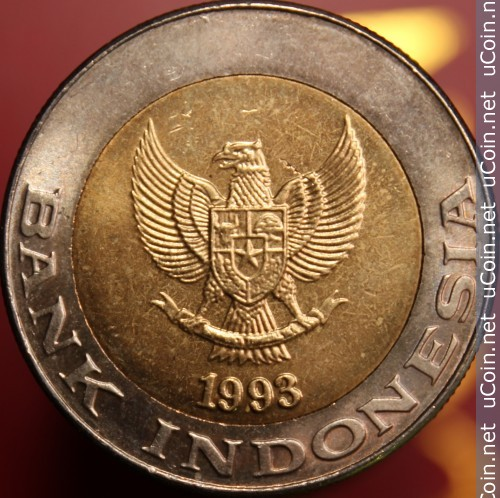

1000 Rupiah,Indonesian Rupiah,indonesia

Class Number :  85


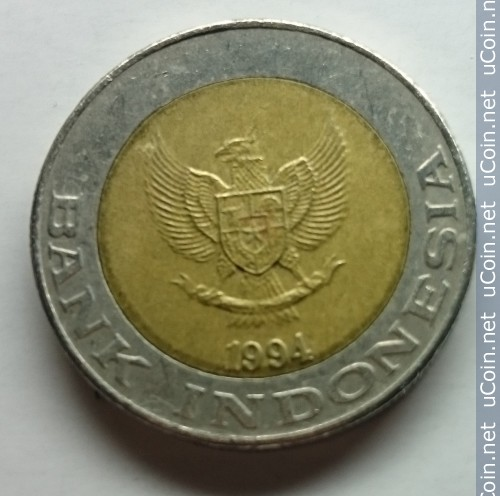

1000 Rupiah,Indonesian Rupiah,indonesia

Class Number :  85


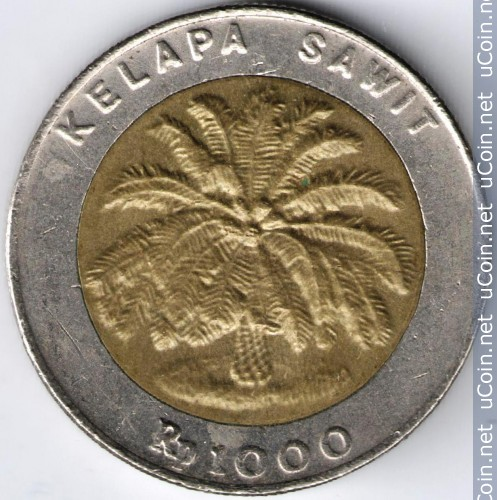

1000 Rupiah,Indonesian Rupiah,indonesia



In [ ]:

import os, random 
test_class_to_display = random.choice(os.listdir("Currency_Images/coins/data/test") )

import cv2
import glob

images = [cv2.imread(file) for file in glob.glob('Currency_Images/coins/data/test/' + str(test_class_to_display) +'/*.jpg')]

from google.colab.patches import cv2_imshow

for img_path in images:
  print ( "Class Number : ", str(test_class_to_display))
  cv2_imshow(img_path)
  cv2.waitKey(0)
  print(cat_2_name[str(test_class_to_display)])
  print() 

In [ ]:
# Transfer Learning : MobileNetV2

In [ ]:
# required imports

from tensorflow.keras.layers import  Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

In [ ]:
# loading MobileNetV2 model
mobile_net_v2 = MobileNetV2(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)

# acquiring trained parameters
for layer in mobile_net_v2.layers:
    layer.trainable = False
  

In [ ]:
# adding a flatten layer
model_mobile_net_v2 = Flatten()(mobile_net_v2.output)

#adding the output layer
prediction = Dense(211, activation='softmax')(model_mobile_net_v2)

# create a model object
model_mobile_net_v2 = Model(inputs=mobile_net_v2.input, outputs=prediction)

model_mobile_net_v2.summary()

Model: "functional_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
# compile the model

model_mobile_net_v2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# required imports

from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# using custom variations on training images as given in docs

data_gen_mobilenet_v2 = ImageDataGenerator(preprocessing_function=mobilenet_v2.preprocess_input)

In [ ]:
# extract training images from directory

training_set = data_gen_mobilenet_v2.flow_from_directory(
                directory = "Currency_Images/coins/data/train",
                class_mode = 'categorical',
                target_size = (224, 224),
                batch_size = 32,
                subset = 'training'
                )

Found 6413 images belonging to 211 classes.


In [ ]:
# validation set images extracted from directory

validation_set = data_gen_mobilenet_v2.flow_from_directory(
        directory = 'Currency_Images/coins/data/validation',
        class_mode='categorical',
        target_size = (224, 224)
)

Found 844 images belonging to 211 classes.


In [ ]:
# test images extracted from directory

test_set = data_gen_mobilenet_v2.flow_from_directory(
        directory = 'Currency_Images/coins/data/test',
        class_mode='categorical',
        target_size = (224, 224),
        batch_size=32
)

Found 844 images belonging to 211 classes.


In [ ]:
# model fit on the training set

history_mobilenet_v2 = model_mobile_net_v2.fit(
                                        training_set,
                                        validation_data = validation_set,
                                        epochs = 10
                             )

Epoch 1/10
201/201 [==============================] - 32s 160ms/step - loss: 12.9916 - accuracy: 0.5294 - val_loss: 9.8096 - val_accuracy: 0.6777
Epoch 2/10
201/201 [==============================] - 31s 156ms/step - loss: 2.7159 - accuracy: 0.8756 - val_loss: 10.6267 - val_accuracy: 0.7156
Epoch 3/10
201/201 [==============================] - 31s 154ms/step - loss: 2.2820 - accuracy: 0.9208 - val_loss: 11.7928 - val_accuracy: 0.7097
Epoch 4/10
201/201 [==============================] - 31s 156ms/step - loss: 1.9076 - accuracy: 0.9365 - val_loss: 11.2071 - val_accuracy: 0.7192
Epoch 5/10
201/201 [==============================] - 31s 155ms/step - loss: 1.9142 - accuracy: 0.9451 - val_loss: 13.7780 - val_accuracy: 0.7014
Epoch 6/10
201/201 [==============================] - 31s 155ms/step - loss: 2.2388 - accuracy: 0.9379 - val_loss: 15.0105 - val_accuracy: 0.6943
Epoch 7/10
201/201 [==============================] - 31s 155ms/step - loss: 2.2586 - accuracy: 0.9398 - val_loss: 16.0584 -

In [ ]:
# final evaluation on the test set

score_mobilenet_v2 = model_mobile_net_v2.evaluate(test_set, verbose=2)

27/27 - 3s - loss: 17.6211 - accuracy: 0.7097


In [ ]:
# test loss and test accuracy

print('MobileNetV2 Model : Test Loss is : ', score_mobilenet_v2[0])
print('MobileNetV2 Model : Test Accuracy is : ', score_mobilenet_v2[1])

MobileNetV2 Model : Test Loss is :  17.621097564697266
MobileNetV2 Model : Test Accuracy is :  0.7097156643867493


In [ ]:
def predict_on_single_image(model_to_predict_on, algo_being_used, img_height, img_width):
  
  # Predict on a single image from the test directory

  import os, random 
  selected_file = random.choice(os.listdir("Currency_Images/coins/data/test") )
  selected_file_picture = random.choice(os.listdir("Currency_Images/coins/data/test/" + str(selected_file)) )

  print("Algorithm being used is : ", algo_being_used, '\n')

  print("Actual Image Class :" , cat_2_name[str(selected_file)])
  print("Actual Image Class Number :", str(selected_file) )
  print()

  from keras.preprocessing import image

  img = image.load_img("Currency_Images/coins/data/test/" + str(selected_file) +'/' + str(selected_file_picture), 
                      target_size = (img_width, img_height))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  model_to_predict_on_pred = model_to_predict_on.predict((img))
  model_to_predict_on_pred_int = np.argmax(model_to_predict_on_pred)

  print("Predicted Image Class : ", cat_2_name[str(model_to_predict_on_pred_int)])
  print("Predicted Image Class Number :", str(model_to_predict_on_pred_int))

In [ ]:
predict_on_single_image(model_mobile_net_v2, "MobileNet V2", 224, 224)

Algorithm being used is :  MobileNet V2 

Actual Image Class : 25 Paise,Indian Rupee,india
Actual Image Class Number : 75

Predicted Image Class :  10 Groszy,Polish Zloty,poland
Predicted Image Class Number : 143


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.set(context = 'paper', style='white')

In [ ]:
def plot_model_loss(model_history, model_being_used):
  # Training vs Validation Loss Visualization :

  history_dict = model_history.history

  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = range(1, len(loss_values) + 1)

  plt.figure(figsize = (10, 5))

  validation_line = plt.plot(epochs, val_loss_values, label = 'Validation Loss')
  train_line = plt.plot(epochs, loss_values, label = 'Training Loss')

  plt.setp(validation_line , linewidth = 2.0, marker = '+', markersize = 10.0)
  plt.setp(train_line, linewidth = 2.0, marker = '4', markersize = 10.0)

  plt.xlabel('Epochs :  ' + str(model_being_used))
  plt.ylabel('(Training/Validation)Loss :  '+ str(model_being_used))
  plt.grid(True)
  plt.legend()
  plt.show()

In [ ]:
def plot_model_accuracy(model_history, model_being_used):
  # Training vs Validation Accuracy Visualization :

  history_dict = model_history.history

  accuracy_values = history_dict['accuracy']
  val_accuracy_values = history_dict['val_accuracy']
  epochs = range(1, len(accuracy_values) + 1)

  plt.figure(figsize = (10, 5))

  validation_line = plt.plot(epochs, val_accuracy_values, label = 'Validation Accuracy')
  train_line = plt.plot(epochs, accuracy_values, label = 'Training Accuracy')

  plt.setp(validation_line , linewidth = 2.0, marker = '+', markersize = 10.0)
  plt.setp(train_line, linewidth = 2.0, marker = '4', markersize = 10.0)

  plt.xlabel('Epochs :  ' + str(model_being_used))
  plt.ylabel('(Training/Validation)Accuracy :  '+ str(model_being_used))
  plt.grid(True)
  plt.legend()
  plt.show()


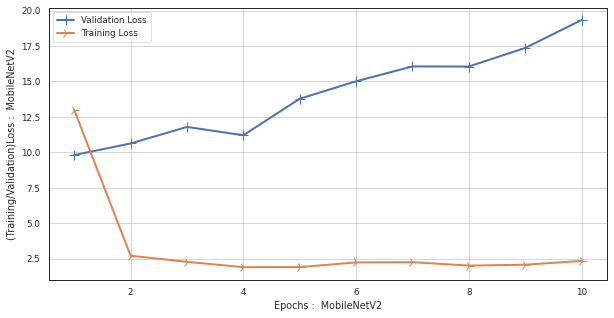

In [ ]:
plot_model_loss(history_mobilenet_v2, "MobileNetV2")

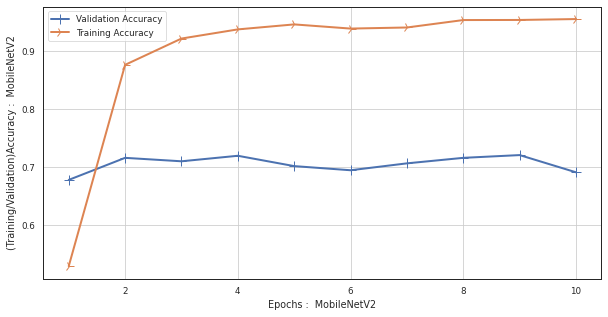

In [ ]:
plot_model_accuracy(history_mobilenet_v2, "MobileNetV2")

In [ ]:
# Transfer Learning : ResNet50

In [ ]:
# required imports

from tensorflow.keras.layers import  Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

In [ ]:
# loading resnet50 architecture
res_net_50 = ResNet50(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)

# acquiring trained parameters for the model
for layer in res_net_50.layers:
    layer.trainable = False
  

In [ ]:
# adding a flatten layer
modified_res_net_50 = Flatten()(res_net_50.output)

# adding an output layer
prediction = Dense(211, activation='softmax')(modified_res_net_50)

# create a model object
modified_res_net_50 = Model(inputs=res_net_50.input, outputs=prediction)

# view the structure of the model
modified_res_net_50.summary()

Model: "functional_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [ ]:
# compile the model

modified_res_net_50.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# required imports

from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# using custom variations as per the resnet50 model
data_gen_resnet50 = ImageDataGenerator(preprocessing_function=resnet50.preprocess_input)

In [ ]:
# extract training images from directory

training_set = data_gen_resnet50.flow_from_directory(
                directory = "Currency_Images/coins/data/train",
                class_mode = 'categorical',
                target_size = (224, 224),
                batch_size = 32,
                subset = 'training'
                )

Found 6413 images belonging to 211 classes.


In [ ]:
# validation set images extracted from directory

validation_set = data_gen_resnet50.flow_from_directory(
        directory = 'Currency_Images/coins/data/validation',
        class_mode='categorical',
        target_size = (224, 224)
)

Found 844 images belonging to 211 classes.


In [ ]:
# test images extracted from directory

test_set = data_gen_resnet50.flow_from_directory(
        directory = 'Currency_Images/coins/data/test',
        class_mode='categorical',
        target_size = (224, 224),
        batch_size=32
)

Found 844 images belonging to 211 classes.


In [ ]:
# model fit on the training set

history_resnet50 = modified_res_net_50.fit(
                                        training_set,
                                        validation_data = validation_set,
                                        epochs = 10
                             )

Epoch 1/10
201/201 [==============================] - 36s 181ms/step - loss: 23.1389 - accuracy: 0.5186 - val_loss: 18.4289 - val_accuracy: 0.6540
Epoch 2/10
201/201 [==============================] - 35s 176ms/step - loss: 4.5174 - accuracy: 0.8763 - val_loss: 17.7224 - val_accuracy: 0.7073
Epoch 3/10
201/201 [==============================] - 36s 177ms/step - loss: 3.9408 - accuracy: 0.9213 - val_loss: 18.2603 - val_accuracy: 0.7227
Epoch 4/10
201/201 [==============================] - 36s 178ms/step - loss: 3.3854 - accuracy: 0.9368 - val_loss: 18.8980 - val_accuracy: 0.7073
Epoch 5/10
201/201 [==============================] - 36s 177ms/step - loss: 4.0650 - accuracy: 0.9305 - val_loss: 20.0038 - val_accuracy: 0.7192
Epoch 6/10
201/201 [==============================] - 35s 176ms/step - loss: 3.8652 - accuracy: 0.9320 - val_loss: 24.2545 - val_accuracy: 0.7334
Epoch 7/10
201/201 [==============================] - 36s 177ms/step - loss: 3.4300 - accuracy: 0.9428 - val_loss: 24.3433 

In [ ]:
# final evaluation on the test set

score_resnet50 = modified_res_net_50.evaluate(test_set, verbose=2)


27/27 - 4s - loss: 30.3600 - accuracy: 0.7322


In [ ]:
# test loss and test accuracy

print('Resnet50 Model : Test Loss is : ', score_resnet50[0])
print('Resnet50 Model : Test Accuracy is : ', score_resnet50[1])

Resnet50 Model : Test Loss is :  30.359952926635742
Resnet50 Model : Test Accuracy is :  0.7322275042533875


In [ ]:
predict_on_single_image(modified_res_net_50, "ResNet 50", 224, 224)

Algorithm being used is :  ResNet 50 

Actual Image Class : 2 Rupees,Pakistan Rupee,pakistan
Actual Image Class Number : 130

Predicted Image Class :  1 Jiao,Chinese Yuan Renminbi,china
Predicted Image Class Number : 35


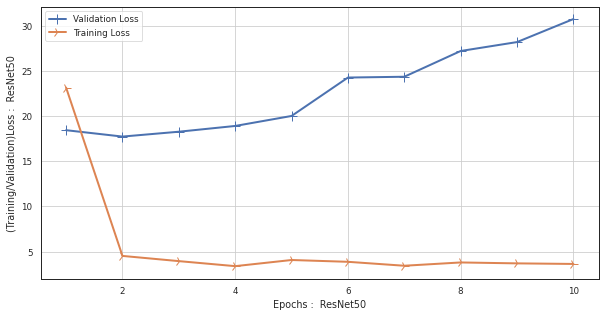

In [ ]:
plot_model_loss(history_resnet50, "ResNet50")

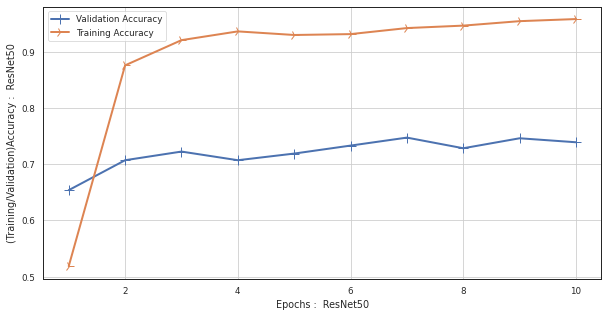

In [ ]:
plot_model_accuracy(history_resnet50, "ResNet50")

In [ ]:
# Using Transfer Learning Models: VGG16

In [ ]:
# required imports

from tensorflow.keras.layers import  Dense, Flatten

from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# loading VGG16 model
vgg = VGG16(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)

# acquiring trained parameters
for layer in vgg.layers:
    layer.trainable = False
  

In [ ]:
# adding a flatten layer
modified_vgg = Flatten()(vgg.output)

# adding final output layer
vgg_pred = Dense(211, activation='softmax')(modified_vgg)

# create a model object
model_vgg = Model(inputs=vgg.input, outputs=vgg_pred)

model_vgg.summary()

Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [ ]:
# compile the model

model_vgg.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# required imports

from tensorflow.python.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# using custom variations on training images as given in docs

data_gen_vgg = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)

In [ ]:
# extract training images from directory

training_set = data_gen_vgg.flow_from_directory(
                directory = "Currency_Images/coins/data/train",
                target_size = (224, 224),
                class_mode = 'categorical',
                batch_size = 32,
                subset = 'training'
                )

Found 6413 images belonging to 211 classes.


In [ ]:
# validation set images extracted from directory

validation_set = data_gen_vgg.flow_from_directory(
        directory = 'Currency_Images/coins/data/validation',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32
)

Found 844 images belonging to 211 classes.


In [ ]:
# test images extracted from directory

test_set = data_gen_vgg.flow_from_directory(
        directory = 'Currency_Images/coins/data/test',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32
)

Found 844 images belonging to 211 classes.


In [ ]:
# model fit on the training set

history_vgg = model_vgg.fit( training_set,
                              validation_data = validation_set,
                              epochs = 10
                             )

Epoch 1/10
201/201 [==============================] - 35s 176ms/step - loss: 33.0499 - accuracy: 0.5305 - val_loss: 32.8661 - val_accuracy: 0.6386
Epoch 2/10
201/201 [==============================] - 35s 175ms/step - loss: 9.1776 - accuracy: 0.8554 - val_loss: 33.8391 - val_accuracy: 0.7026
Epoch 3/10
201/201 [==============================] - 35s 174ms/step - loss: 6.9025 - accuracy: 0.9050 - val_loss: 34.1445 - val_accuracy: 0.7168
Epoch 4/10
201/201 [==============================] - 35s 175ms/step - loss: 6.2936 - accuracy: 0.9237 - val_loss: 36.8217 - val_accuracy: 0.7370
Epoch 5/10
201/201 [==============================] - 35s 175ms/step - loss: 6.6947 - accuracy: 0.9301 - val_loss: 41.0469 - val_accuracy: 0.7227
Epoch 6/10
201/201 [==============================] - 35s 175ms/step - loss: 5.9013 - accuracy: 0.9445 - val_loss: 41.8491 - val_accuracy: 0.7192
Epoch 7/10
201/201 [==============================] - 35s 174ms/step - loss: 6.2573 - accuracy: 0.9457 - val_loss: 44.6026 

In [ ]:
# final evaluation on the test set

score_vgg16 = model_vgg.evaluate(test_set, verbose=2)


27/27 - 4s - loss: 43.7425 - accuracy: 0.7678


In [ ]:
# test loss and test accuracy

print('VGG16 Model : Test Loss is : ', score_vgg16[0])
print('VGG16 Model : Test Accuracy is : ', score_vgg16[1])

VGG16 Model : Test Loss is :  43.74250411987305
VGG16 Model : Test Accuracy is :  0.7677724957466125


In [ ]:
predict_on_single_image(model_vgg, "Vgg 16", 224, 224)

Algorithm being used is :  Vgg 16 

Actual Image Class : 50 Cents,Hong Kong dollar,hong_kong
Actual Image Class Number : 63

Predicted Image Class :  2 Kronor,Swedish Krona,sweden
Predicted Image Class Number : 174


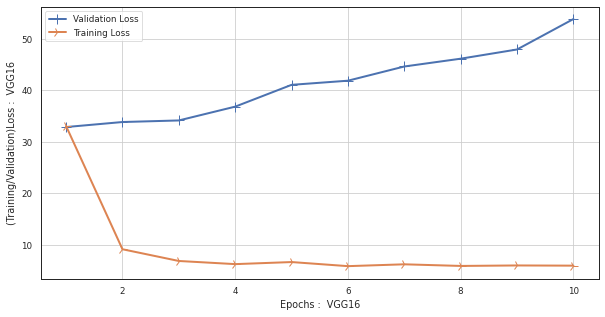

In [ ]:
plot_model_loss(history_vgg, "VGG16")

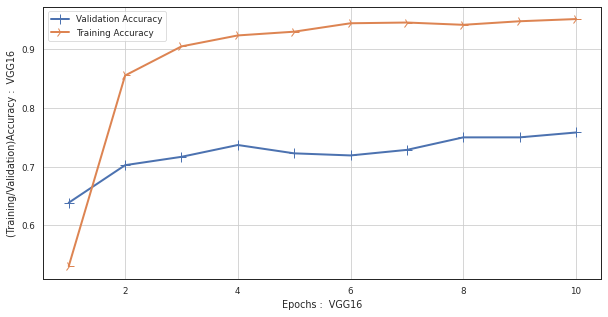

In [ ]:
plot_model_accuracy(history_vgg, "VGG16")

In [ ]:
# Transfer Learning Model: InceptionV3

In [ ]:
# required imports

from tensorflow.keras.layers import  Dense, Flatten

from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3


In [ ]:
# loading InceptionV3 model
inception_v3 = InceptionV3(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)

# acquiring trained parameters
for layer in inception_v3.layers:
    layer.trainable = False
  

In [ ]:
# adding a flatten layer
inception_v3_model = Flatten()(inception_v3.output)

# adding final output layer
inception_v3_model_pred = Dense(211, activation='softmax')(inception_v3_model)

# create a model object
inception_v3_model = Model(inputs=inception_v3.input, outputs=inception_v3_model_pred)

inception_v3_model.summary()

Model: "functional_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_491 (Conv2D)             (None, 111, 111, 32) 864         input_19[0][0]                   
__________________________________________________________________________________________________
batch_normalization_485 (BatchN (None, 111, 111, 32) 96          conv2d_491[0][0]                 
__________________________________________________________________________________________________
activation_485 (Activation)     (None, 111, 111, 32) 0           batch_normalization_485[0][0]    
______________________________________________________________________________________

In [ ]:
# compile the model

inception_v3_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# required imports

from tensorflow.python.keras.applications import inception_v3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# using custom variations on training images as given in docs

data_gen_inception_v3 = ImageDataGenerator(preprocessing_function=inception_v3.preprocess_input)

In [ ]:
# extract training images from directory

training_set = data_gen_inception_v3.flow_from_directory(
                directory = "Currency_Images/coins/data/train",
                target_size = (224, 224),
                class_mode = 'categorical',
                batch_size = 32,
                subset = 'training'
                )

Found 6413 images belonging to 211 classes.


In [ ]:
# validation set images extracted from directory

validation_set = data_gen_inception_v3.flow_from_directory(
        directory = 'Currency_Images/coins/data/validation',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32
)

Found 844 images belonging to 211 classes.


In [ ]:
# test images extracted from directory

test_set = data_gen_inception_v3.flow_from_directory(
        directory = 'Currency_Images/coins/data/test',
        target_size=(224, 224),
        class_mode='categorical',
        batch_size=32
)

Found 844 images belonging to 211 classes.


In [ ]:
# model fit on the training set

history_inception_v3 = inception_v3_model.fit( training_set,
                              validation_data = validation_set,
                              epochs = 10
                             )

Epoch 1/10
201/201 [==============================] - 34s 168ms/step - loss: 17.0812 - accuracy: 0.4157 - val_loss: 10.3470 - val_accuracy: 0.5640
Epoch 2/10
201/201 [==============================] - 32s 162ms/step - loss: 3.8616 - accuracy: 0.7854 - val_loss: 10.1496 - val_accuracy: 0.6351
Epoch 3/10
201/201 [==============================] - 33s 163ms/step - loss: 2.9152 - accuracy: 0.8494 - val_loss: 12.7152 - val_accuracy: 0.6090
Epoch 4/10
201/201 [==============================] - 32s 161ms/step - loss: 2.3739 - accuracy: 0.8821 - val_loss: 11.8889 - val_accuracy: 0.6374
Epoch 5/10
201/201 [==============================] - 32s 161ms/step - loss: 2.2439 - accuracy: 0.9111 - val_loss: 11.8274 - val_accuracy: 0.6872
Epoch 6/10
201/201 [==============================] - 32s 162ms/step - loss: 2.0522 - accuracy: 0.9203 - val_loss: 13.3965 - val_accuracy: 0.6623
Epoch 7/10
201/201 [==============================] - 33s 163ms/step - loss: 1.8071 - accuracy: 0.9312 - val_loss: 13.6977 

In [ ]:
# final evaluation on the test set

score_inception_v3 = inception_v3_model.evaluate(test_set, verbose=2)


27/27 - 4s - loss: 18.1115 - accuracy: 0.6576


In [ ]:
# test loss and test accuracy

print('Inception V3 Model : Test Loss is : ', score_inception_v3[0])
print('Inception V3 Model : Test Accuracy is : ', score_inception_v3[1])

Inception V3 Model : Test Loss is :  18.111482620239258
Inception V3 Model : Test Accuracy is :  0.6575829386711121


In [ ]:
predict_on_single_image(inception_v3_model, "Inception V3" , 224, 224)

Algorithm being used is :  Inception V3 

Actual Image Class : 25 Kurus,Turkish Lira,turkey
Actual Image Class Number : 203

Predicted Image Class :  50 Cents,New Zealand dollar,new_zealand
Predicted Image Class Number : 121


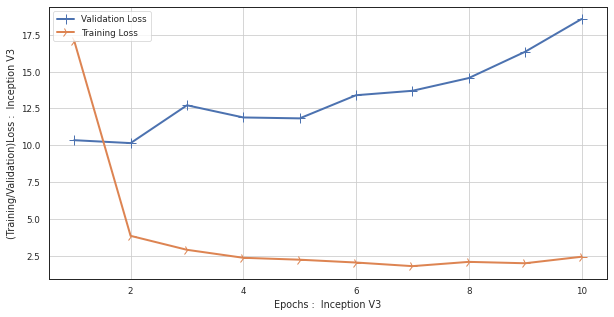

In [ ]:
plot_model_loss(history_inception_v3, "Inception V3")

In [ ]:
# Custom Model:

In [ ]:
# module used to generate custom variations on the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# variations on the training set images

train_data_gen = ImageDataGenerator(
    rescale=1./255.0, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )


In [ ]:
# extract training images from directory

training_set = train_data_gen.flow_from_directory(
                directory = "Currency_Images/coins/data/train",
                target_size = (64, 64),
                class_mode = 'categorical',
                batch_size = 32,
                subset = 'training'
                )

Found 6413 images belonging to 211 classes.


In [ ]:
# variations on validation set images : rescaling

valid_data_gen = ImageDataGenerator(
    rescale=1./255.0
    )


In [ ]:
# validation set images extracted from directory

validation_set = valid_data_gen.flow_from_directory(
        directory = 'Currency_Images/coins/data/validation',
        target_size=(64, 64),
        class_mode='categorical',
        batch_size=32
)

Found 844 images belonging to 211 classes.


In [ ]:
# variations on the test images : rescaling

test_data_gen = ImageDataGenerator(rescale=1./255.0)

In [ ]:
# test images extracted from directory

test_set = test_data_gen.flow_from_directory(
        directory = 'Currency_Images/coins/data/test',
        target_size=(64, 64),
        class_mode='categorical',
        batch_size=32
)

Found 844 images belonging to 211 classes.


In [ ]:
# imports for the custom model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense

In [ ]:
### how to select input for first layer
## activation functions

# initiating the model
custom_model = Sequential()

# first set of convolution and pooling operations along with dropout
custom_model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)))
custom_model.add(MaxPool2D(2,2))
custom_model.add(Dropout(0.2))

# second set of convolution and pooling operations along with dropout
custom_model.add(Conv2D(32,(3,3),activation='relu'))
custom_model.add(MaxPool2D(2,2))
custom_model.add(Dropout(0.3))

# third set of convolution and pooling operations along with dropout
custom_model.add(Conv2D(64,(3,3),activation='relu'))
custom_model.add(MaxPool2D(2,2))
custom_model.add(Dropout(0.3))

# flattening the output from previous layers
custom_model.add(Flatten())

# first dense layer followed by a 0.4 dropout layer
custom_model.add(Dense(1024,activation='relu'))
custom_model.add(Dropout(0.4))

# second dense layer followed by a 0.4 dropout layer
custom_model.add(Dense(1024,activation='relu'))
custom_model.add(Dropout(0.4))

# third dense layer followed by a 0.4 dropout layer
custom_model.add(Dense(1024,activation='relu'))
custom_model.add(Dropout(0.4))

# fourth dense layer followed by a 0.2 dropout layer
custom_model.add(Dense(512,activation='relu'))
custom_model.add(Dropout(0.2))

# fifth dense layer followed by a 0.2 dropout layer
custom_model.add(Dense(512,activation='relu'))
custom_model.add(Dropout(0.2))

# output layer
custom_model.add(Dense(211,activation='softmax'))

In [ ]:
# compile the model

custom_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
custom_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_594 (Conv2D)          (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_595 (Conv2D)          (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_596 (Conv2D)          (None, 12, 12, 64)       

In [ ]:
# model fit on the training set

history_custom_model = custom_model.fit(training_set,
                            validation_data = validation_set,
                            epochs = 50
                            )

Epoch 1/50
201/201 [==============================] - 30s 150ms/step - loss: 5.3333 - accuracy: 0.0083 - val_loss: 5.3034 - val_accuracy: 0.0095
Epoch 2/50
201/201 [==============================] - 30s 151ms/step - loss: 5.1000 - accuracy: 0.0161 - val_loss: 5.0577 - val_accuracy: 0.0083
Epoch 3/50
201/201 [==============================] - 30s 151ms/step - loss: 4.9524 - accuracy: 0.0157 - val_loss: 4.9825 - val_accuracy: 0.0095
Epoch 4/50
201/201 [==============================] - 31s 152ms/step - loss: 4.9216 - accuracy: 0.0172 - val_loss: 4.9557 - val_accuracy: 0.0118
Epoch 5/50
201/201 [==============================] - 30s 151ms/step - loss: 4.8804 - accuracy: 0.0209 - val_loss: 4.9411 - val_accuracy: 0.0142
Epoch 6/50
201/201 [==============================] - 30s 151ms/step - loss: 4.8385 - accuracy: 0.0268 - val_loss: 4.8642 - val_accuracy: 0.0130
Epoch 7/50
201/201 [==============================] - 30s 151ms/step - loss: 4.7833 - accuracy: 0.0288 - val_loss: 4.8232 - val_ac

In [ ]:
# final evaluation on the test set

score_custom_model = custom_model.evaluate(test_set, verbose=2)


27/27 - 3s - loss: 4.2468 - accuracy: 0.1066


In [ ]:
# test loss and test accuracy

print('Custom Model : Test Loss is : ', score_custom_model[0])
print('Custom Model : Test Accuracy is : ', score_custom_model[1])

Custom Model : Test Loss is :  4.246798515319824
Custom Model : Test Accuracy is :  0.10663507133722305


In [ ]:
predict_on_single_image(custom_model, "Custom Model", 64, 64)

Algorithm being used is :  Custom Model 

Actual Image Class : 10 Groszy,Polish Zloty,poland
Actual Image Class Number : 143

Predicted Image Class :  5 Won,Korean Won,south_korea
Predicted Image Class Number : 100


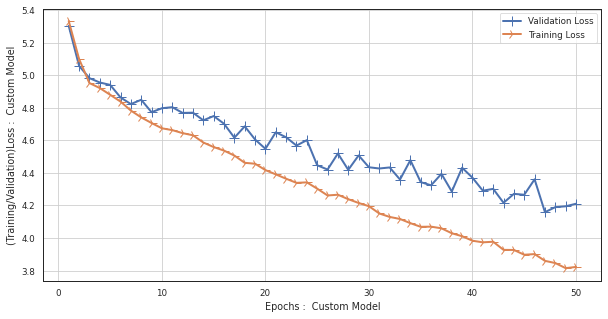

In [ ]:
plot_model_loss(history_custom_model, "Custom Model")

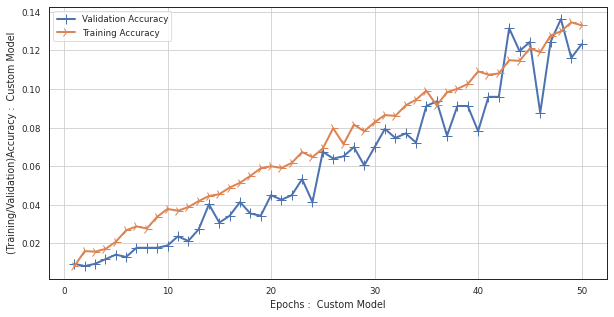

In [ ]:
plot_model_accuracy(history_custom_model, "Custom Model")

In [ ]:
# Transfer Learning models generate better accuracy than custom made developed models
# Transfer Learning models implement state of the art algorithms